<a href="https://colab.research.google.com/github/HassanSaeed107/Smartphones/blob/main/Smartphones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('/content/smartphones.csv')
data


,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00
...,...,...,...,...,...,...,...,...
1811,Xiaomi Redmi Note 8 4/64GB Azul Libre,Xiaomi,Redmi Note 8,4.0,64.0,Blue,Yes,249.01
1812,Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre,Xiaomi,Redmi Note 8T,4.0,128.0,Blue,Yes,200.00
1813,Xiaomi Redmi Note 9 4/128GB Blanco Libre,Xiaomi,Redmi Note 9,4.0,128.0,White,Yes,269.00
1814,Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre,Xiaomi,Note 9S,4.0,64.0,Gray,Yes,211.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1333 non-null   float64
 4   Storage      1791 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB


In [ ]:
data.isna().sum()

Smartphone       0
Brand            0
Model            0
RAM            483
Storage         25
Color            0
Free             0
Final Price      0
dtype: int64

In [ ]:
mean_ram = data['RAM'].mean()
data['RAM'] = data['RAM'].fillna(mean_ram)

print(data['RAM'])

0        8.0
1        4.0
2        4.0
3        6.0
4       12.0
        ... 
1811     4.0
1812     4.0
1813     4.0
1814     4.0
1815     6.0
Name: RAM, Length: 1816, dtype: float64


In [ ]:
mean_storage = data['Storage'].mean()
data['Storage'] = data['Storage'].fillna(mean_storage)

print(data['Storage'])

0       256.0
1       128.0
2       128.0
3       128.0
4       512.0
        ...  
1811     64.0
1812    128.0
1813    128.0
1814     64.0
1815    128.0
Name: Storage, Length: 1816, dtype: float64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1816 non-null   float64
 4   Storage      1816 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB


In [ ]:
data.describe()

,RAM,Storage,Final Price
count,1816.000000,1816.000000,1816.000000
mean,5.960990,162.652150,492.175573
std,2.285657,138.448141,398.606183
min,1.000000,2.000000,60.460000
25%,4.000000,64.000000,200.990000
50%,5.960990,128.000000,349.990000
75%,8.000000,256.000000,652.717500
max,12.000000,1000.000000,2271.280000


<ipython-input-9-a7fa78fb8f55>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette=colors)


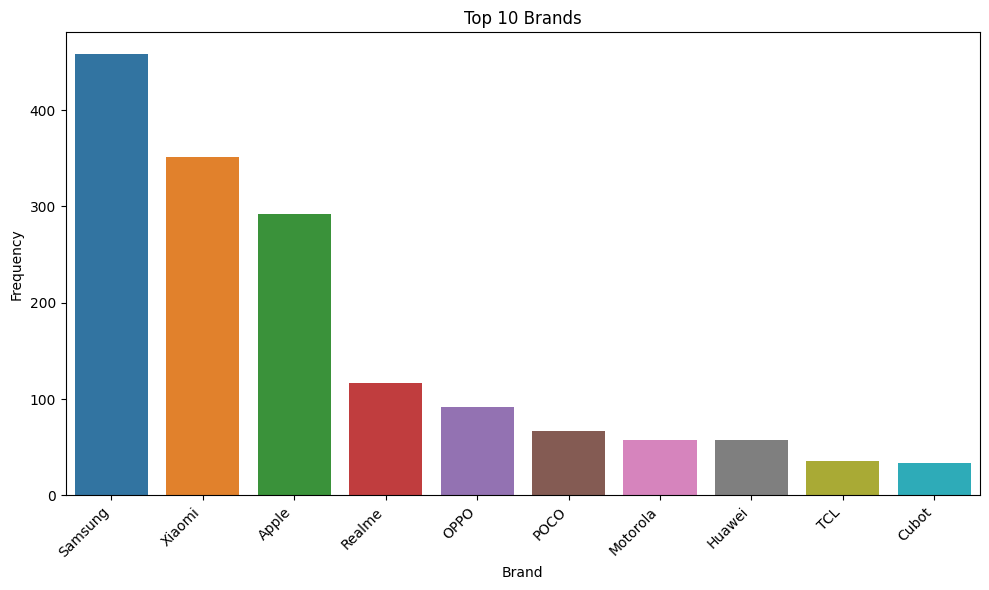

In [ ]:
# Calculate the frequency of each brand
brand_counts = data['Brand'].value_counts().head(10)

# Create a color palette with distinct colors for each brand
colors = sns.color_palette("tab10", len(brand_counts))

# Create a bar chart for the top 10 brands
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette=colors)
plt.title("Top 10 Brands")
plt.xlabel("Brand")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-10-e7d910dd0e19>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette=colors)


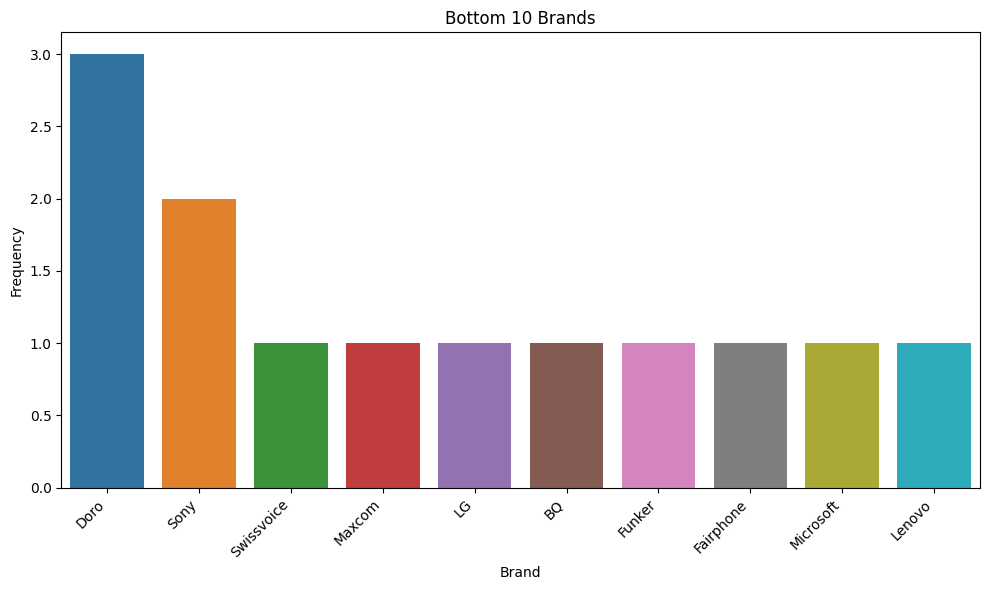

In [ ]:
brand_counts = data['Brand'].value_counts().tail(10)

colors = sns.color_palette("tab10", len(brand_counts))

# Create a bar chart for the top 10 brands
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette=colors)
plt.title("Bottom 10 Brands")
plt.xlabel("Brand")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-11-e688de79e9fb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_counts.index, y=model_counts.values, palette=colors)


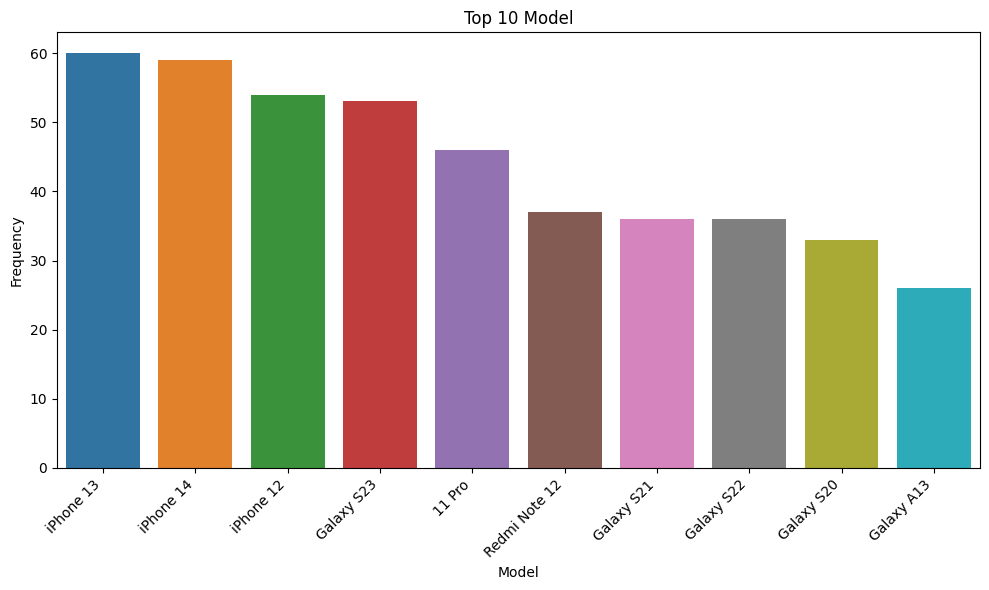

In [ ]:
# Calculate the frequency of each brand
model_counts = data['Model'].value_counts().head(10)

# Create a color palette with distinct colors for each brand
colors = sns.color_palette("tab10", len(model_counts))

# Create a bar chart for the top 10 brands
plt.figure(figsize=(10, 6))
sns.barplot(x=model_counts.index, y=model_counts.values, palette=colors)
plt.title("Top 10 Model")
plt.xlabel("Model")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-12-b589c1479601>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_counts.index, y=model_counts.values, palette=colors)


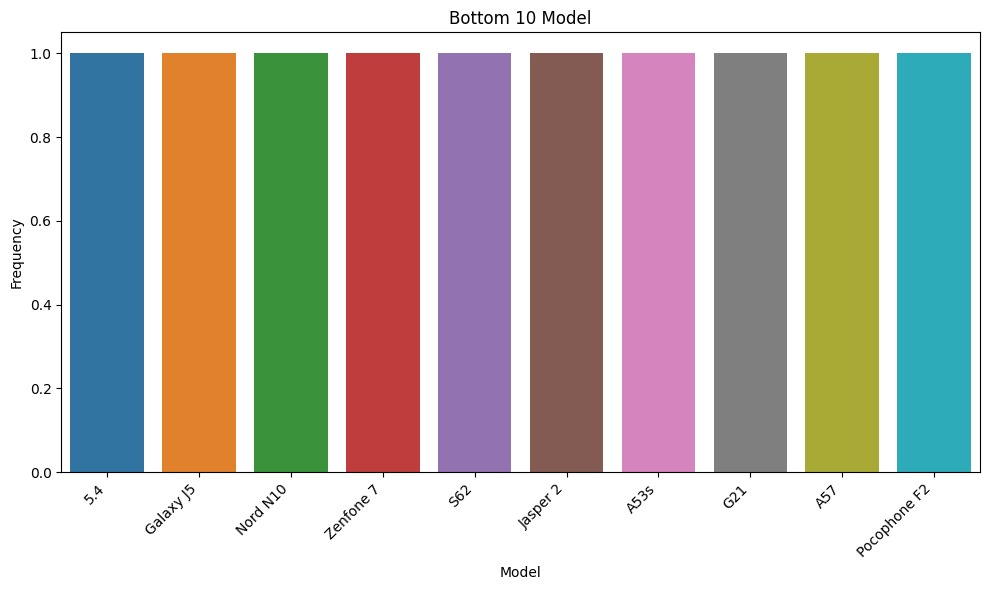

In [ ]:
# Calculate the frequency of each brand
model_counts = data['Model'].value_counts().tail(10)

# Create a color palette with distinct colors for each brand
colors = sns.color_palette("tab10", len(model_counts))

# Create a bar chart for the top 10 brands
plt.figure(figsize=(10, 6))
sns.barplot(x=model_counts.index, y=model_counts.values, palette=colors)
plt.title("Bottom 10 Model")
plt.xlabel("Model")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-13-cce3afac888d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color_counts.index, y=color_counts.values, palette=colors)


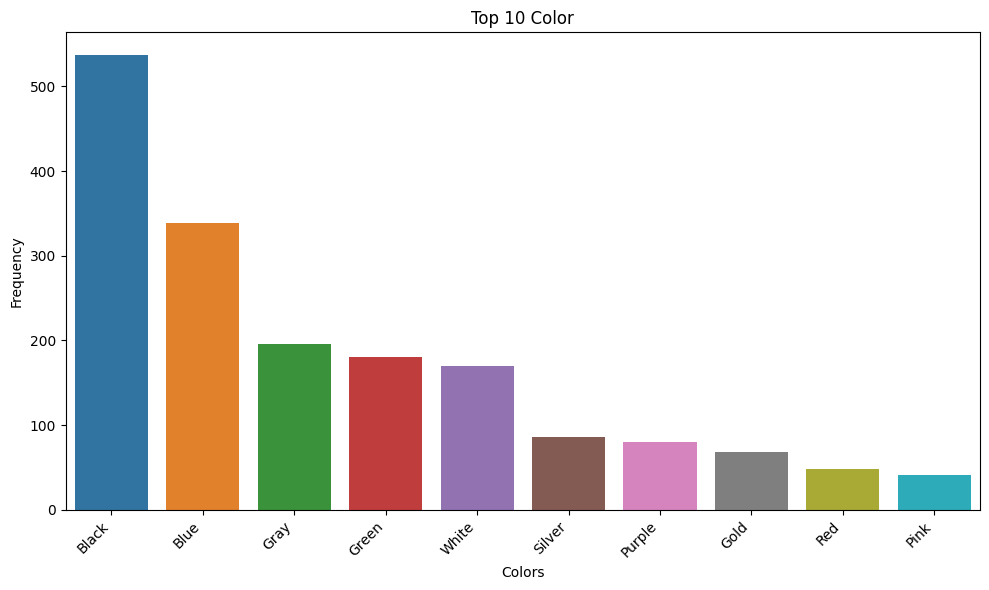

In [ ]:
# Calculate the frequency of each brand
color_counts = data['Color'].value_counts().head(10)

# Create a color palette with distinct colors for each brand
colors = sns.color_palette("tab10", len(color_counts))

# Create a bar chart for the top 10 brands
plt.figure(figsize=(10, 6))
sns.barplot(x=color_counts.index, y=color_counts.values, palette=colors)
plt.title("Top 10 Color")
plt.xlabel("Colors")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-14-26cfd1a14645>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color_counts.index, y=color_counts.values, palette=colors)


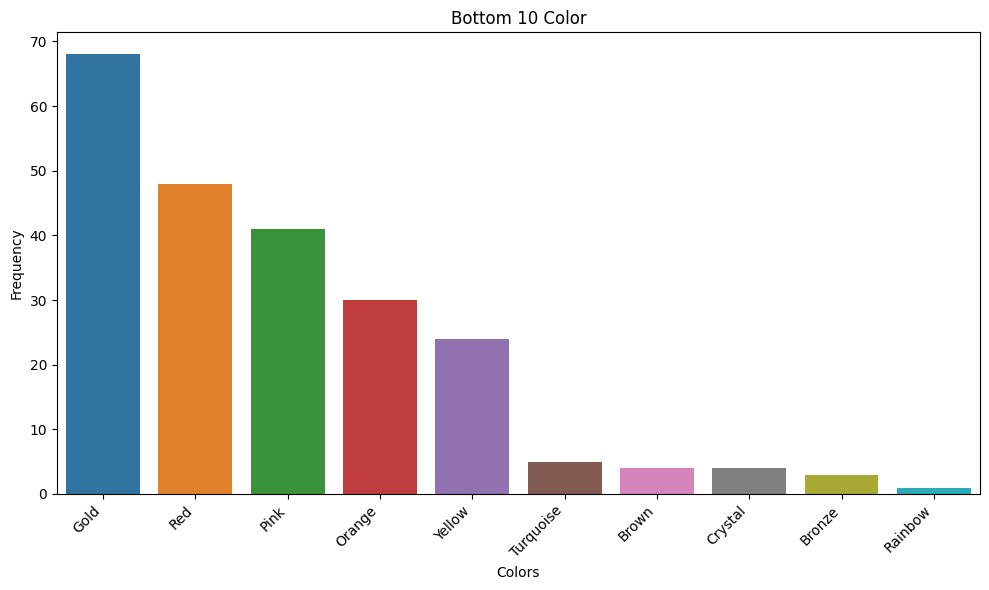

In [ ]:
# Calculate the frequency of each brand
color_counts = data['Color'].value_counts().tail(10)

# Create a color palette with distinct colors for each brand
colors = sns.color_palette("tab10", len(color_counts))

# Create a bar chart for the top 10 brands
plt.figure(figsize=(10, 6))
sns.barplot(x=color_counts.index, y=color_counts.values, palette=colors)
plt.title("Bottom 10 Color")
plt.xlabel("Colors")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-15-b4b16e29dd40>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=free_counts.index, y=free_counts.values, palette=colors)


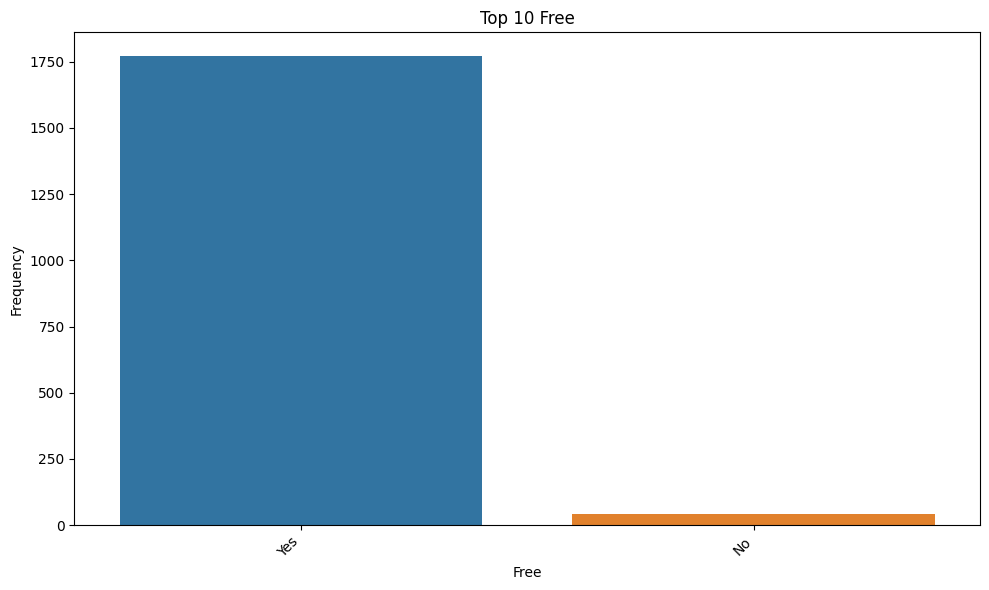

In [ ]:
# Calculate the frequency of each brand
free_counts = data['Free'].value_counts().head(10)

# Create a color palette with distinct colors for each brand
colors = sns.color_palette("tab10", len(free_counts))

# Create a bar chart for the top 10 brands
plt.figure(figsize=(10, 6))
sns.barplot(x=free_counts.index, y=free_counts.values, palette=colors)
plt.title("Top 10 Free")
plt.xlabel("Free")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Correlation Map

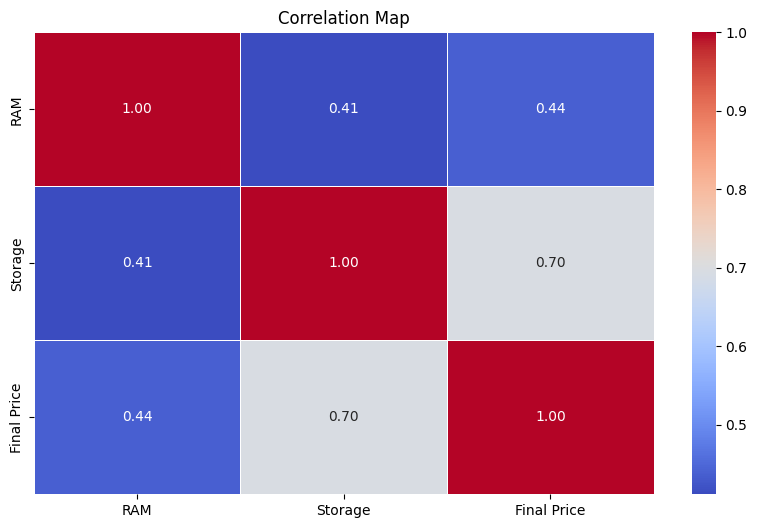

In [ ]:
numerical_columns = ['RAM', 'Storage', 'Final Price']
numeric_value = data[numerical_columns]

correlation_matrix = numeric_value.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Map')
plt.show()

# Scatter Plot to visualize relationships between numerical variables (RAM, Storage, and Final Price):

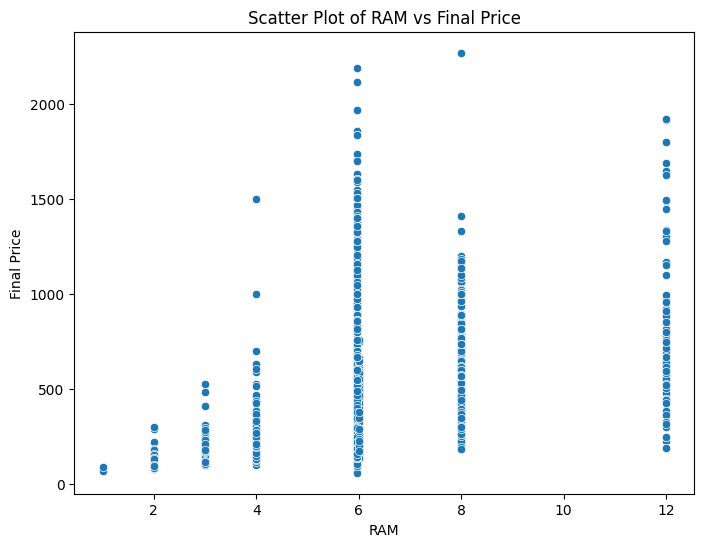

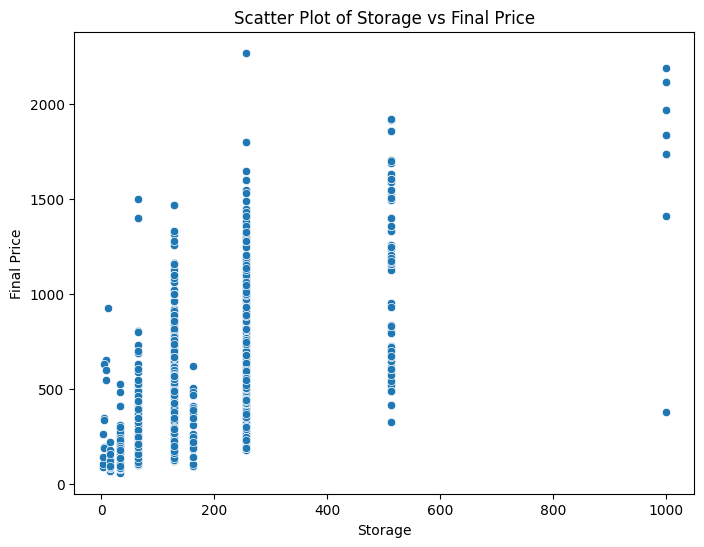

In [ ]:
# Assuming df is your DataFrame containing the cleaned smartphone data

# Scatter plot between RAM and Final Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RAM', y='Final Price', data=data)
plt.title('Scatter Plot of RAM vs Final Price')
plt.xlabel('RAM')
plt.ylabel('Final Price')
plt.show()

# Scatter plot between Storage and Final Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Storage', y='Final Price', data=data)
plt.title('Scatter Plot of Storage vs Final Price')
plt.xlabel('Storage')
plt.ylabel('Final Price')
plt.show()

# Histograms to visualize the distributions of individual variables (RAM, Storage, and Final Price):

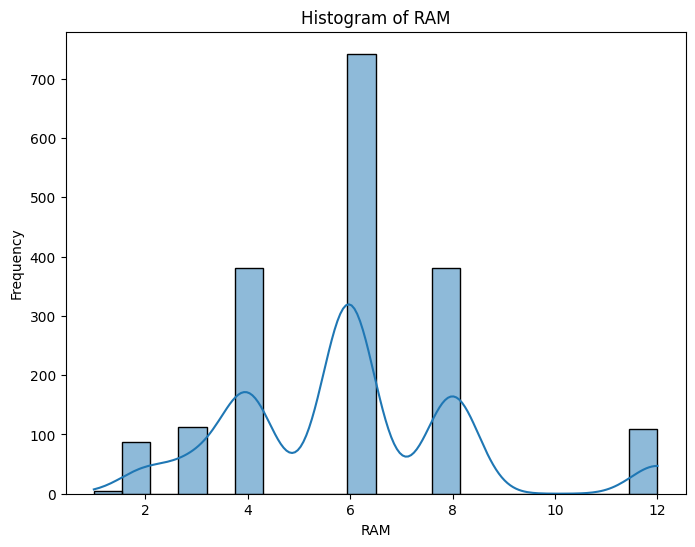

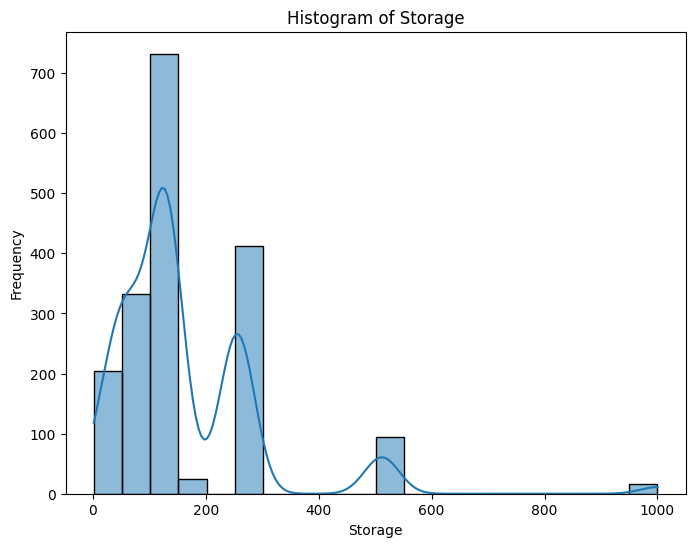

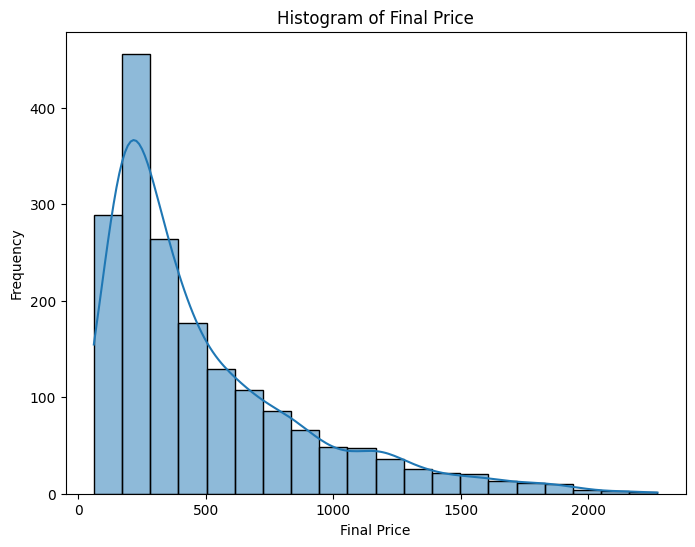

In [ ]:
# Histogram of RAM
plt.figure(figsize=(8, 6))
sns.histplot(data['RAM'], bins=20, kde=True)
plt.title('Histogram of RAM')
plt.xlabel('RAM')
plt.ylabel('Frequency')
plt.show()

# Histogram of Storage
plt.figure(figsize=(8, 6))
sns.histplot(data['Storage'], bins=20, kde=True)
plt.title('Histogram of Storage')
plt.xlabel('Storage')
plt.ylabel('Frequency')
plt.show()

# Histogram of Final Price
plt.figure(figsize=(8, 6))
sns.histplot(data['Final Price'], bins=20, kde=True)
plt.title('Histogram of Final Price')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.show()

# Box Plots to visualize the distributions and detect outliers:

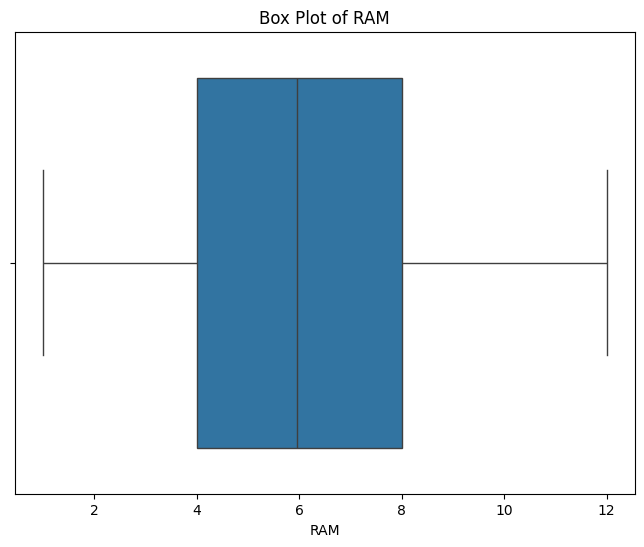

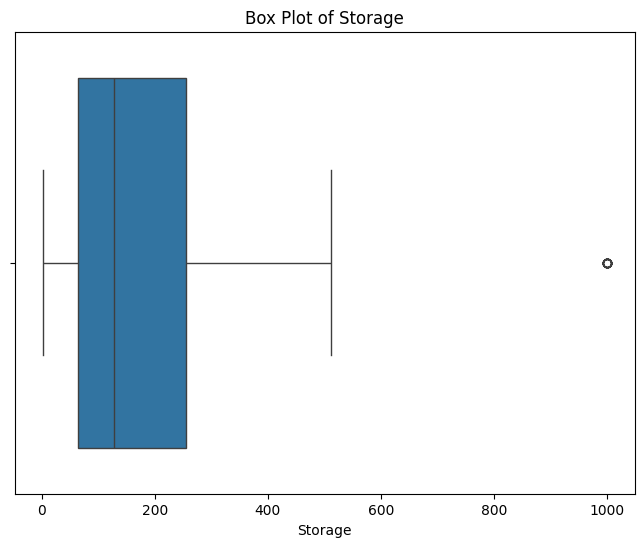

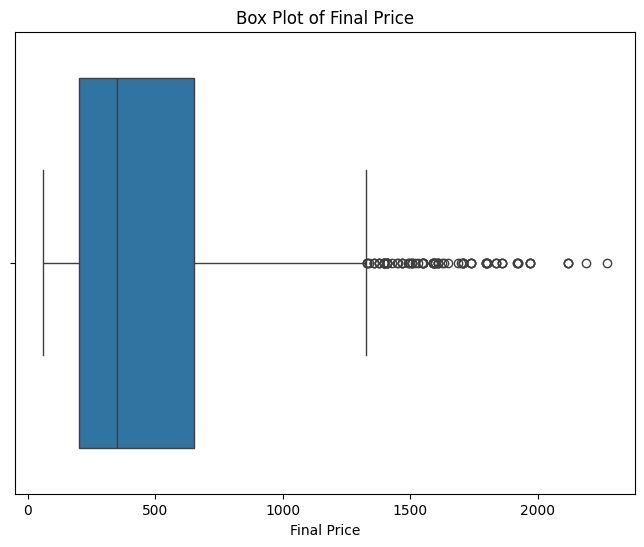

In [ ]:
# Box plot of RAM
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['RAM'])
plt.title('Box Plot of RAM')
plt.xlabel('RAM')
plt.show()

# Box plot of Storage
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Storage'])
plt.title('Box Plot of Storage')
plt.xlabel('Storage')
plt.show()

# Box plot of Final Price
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Final Price'])
plt.title('Box Plot of Final Price')
plt.xlabel('Final Price')
plt.show()

# Price Analysis by Brand or Model

In [ ]:
# Price analysis by Brand
brand_avg_price = data.groupby('Brand')['Final Price'].mean().sort_values(ascending=False)
print("Average Final Price by Brand:")
print(brand_avg_price)

# Price analysis by Model
model_avg_price = data.groupby('Model')['Final Price'].mean().sort_values(ascending=False)
print("\nAverage Final Price by Model:")
print(model_avg_price)

Average Final Price by Brand:
Brand
Apple         842.396815
Lenovo        757.180000
Asus          751.573333
Nothing       657.748889
Samsung       639.754367
Fairphone     634.190000
OnePlus       571.135909
LG            570.740000
Microsoft     552.390000
Google        516.978889
Crosscall     497.754286
Huawei        429.191579
OPPO          415.113370
Motorola      399.899123
Honor         395.626667
CAT           378.208333
Nokia         338.124615
Vivo          330.651111
POCO          328.073731
Xiaomi        326.669744
Realme        311.799487
Ulefone       259.109333
Doro          254.410000
Gigaset       252.346667
Sony          248.230000
Hammer        242.617143
Funker        220.780000
Blackview     215.399259
TCL           188.088889
Swissvoice    179.990000
Cubot         179.586765
BQ            140.760000
Maxcom        123.880000
ZTE           122.491176
Alcatel       113.842857
Qubo          104.646667
SPC           102.763636
Name: Final Price, dtype: float64

Aver

# Market Share Analysis

In [ ]:
# Market share analysis by Brand
brand_market_share = data['Brand'].value_counts(normalize=True) * 100
print("Market Share by Brand:")
print(brand_market_share)

# Market share analysis by Model
model_market_share = data['Model'].value_counts(normalize=True) * 100
print("\nMarket Share by Model:")
print(model_market_share)

Market Share by Brand:
Brand
Samsung       25.220264
Xiaomi        19.328194
Apple         16.079295
Realme         6.442731
OPPO           5.066079
POCO           3.689427
Motorola       3.138767
Huawei         3.138767
TCL            1.982379
Cubot          1.872247
Ulefone        1.651982
Blackview      1.486784
Vivo           1.486784
Honor          1.486784
OnePlus        1.211454
Hammer         1.156388
ZTE            0.936123
Nokia          0.715859
SPC            0.605727
Google         0.495595
Nothing        0.495595
Alcatel        0.385463
Crosscall      0.385463
CAT            0.330396
Gigaset        0.165198
Qubo           0.165198
Asus           0.165198
Doro           0.165198
Sony           0.110132
Swissvoice     0.055066
Maxcom         0.055066
LG             0.055066
BQ             0.055066
Funker         0.055066
Fairphone      0.055066
Microsoft      0.055066
Lenovo         0.055066
Name: proportion, dtype: float64

Market Share by Model:
Model
iPhone 13       3.30

# Machine Learning Models

In [ ]:
# Select features (X) and target variable (y)
X = data[['RAM', 'Storage']]  # Features
y = data['Final Price']  # Target variable

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression model

In [ ]:
# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print coefficients to understand feature importance
print("Coefficients:", model.coef_)

Mean Squared Error: 89416.60122169329
Coefficients: [35.46018026  1.68728807]


In [ ]:
file_path = 'Mobilephones_clean.csv'
data.to_csv(file_path, index=False)
print("Dataset saved successfully as", file_path)

Dataset saved successfully as Mobilephones_clean.csv
